# Model Validation

Main goals:

* Use train/test/validation sets
* Use cross-validation
* Tune hyperparameters
* Visualise results

We will work with `sklearn` and the usual data science libraries that we import now:

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import sklearn

# Spam or not spam?

The `spam.csv` file is described [here](https://www.kaggle.com/somesh24/spambase).

It contains emails classified as spam (class==1) and not spam (class==0). Each email also has some features associated with it, measuring the frequency of certain words and how many capital letters were used in the email.

Load the file into `pandas` and have a look at it. How many data points are there? Are the spam/not spam classes balanced?

In [2]:
data = pd.read_csv('data/spam.csv')

print(f"There are {data.shape[0]} data points with {data.shape[1]} variables each")

print(data['class'].value_counts(normalize=True))

There are 4601 data points with 58 variables each
class
0    0.605955
1    0.394045
Name: proportion, dtype: float64


## Data partitioning

You will train a classifier for labeling email as spam or not. The k-nearest neighbours (KNN) classifier will need fine-tuning and you also want to be confident in the model's performance: the available data is slightly imbalanced and also potentially noisy.

Use `sklearn.model_selection.train_test_split` to first create a train/test split with appropriate proportions.

Then, split the test partition in half again to create test and validation sets.

Save the results in the variables `x_train`, `x_test`, `x_val`, `y_train`, `y_test`, `y_val`.

In [6]:
from sklearn.model_selection import train_test_split

# x should be every column except the one we are trying to predict!
x = data.drop(['class'], axis=1)
# y is *only* the column we want to predict
y = data['class']

# Your code below...
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


Check the number of items in each partition: train/test/validation.

Make sure the x and y parts of each contain the same number of items.

In [ ]:
# Your code below...


`train_test_split` works on all sorts of data types: lists, `numpy` arrays, `pandas` Series and DataFrames. It returns the same type of data it was given.

Here, the `x` features are in a DataFrame, the `y` labels are in a Series.

How many examples of spam/not spam are in each partition?

(Because the `y` values are 0 and 1, you can use the `.sum()` method on a Series and divide by the length of it to get the proportion of positive classes. Or you can use the `.value_counts(normalize=True)` method - this is better when the values are not 0/1 but something like A/B.)

In [ ]:
# Your code here...


## Train a model

Over the following steps, you will set up and train a model, then evaluate it.

First, create a `KNN` model (`model`) with the default settings.

In [4]:
from sklearn.neighbors import KNeighborsClassifier as KNN

# Your code here...
model = KNN()

Now, use the model's `.fit()` method to learn the training data.

In [7]:
# Your code here...
model.fit(x_train, y_train)


KNeighborsClassifier()

With the trained model, use its `.predict()` method to classify the test set. Save the result in the variable `predictions`.

Compare the first ten predictions to the expected values.

(Note: The output of the models is a `numpy` array, but the train/test data from `train_test_split` is in a `pandas.Series` object. You can get the raw values from a Series via the `.values` attribute.)  

In [10]:
# Your code here...
predictions = model.predict(x_test)


Calculate the accuracy and F1 score for the model's predictions.

In [12]:
from sklearn.metrics import accuracy_score, f1_score

# Your code here...
print(accuracy_score(y_test, predictions))
print(f1_score(y_test, predictions, pos_label=1))

0.7980456026058632
0.7387640449438202


Use `sklearn.metrics.classification_report` to generate a report on the model's performance.

How does the model perform for each class? Would you rather a model which is better at classifying emails as spam, or as not spam?

In [13]:
from sklearn.metrics import classification_report

# Your code here...
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.82      0.85      0.84       554
           1       0.76      0.72      0.74       367

    accuracy                           0.80       921
   macro avg       0.79      0.78      0.79       921
weighted avg       0.80      0.80      0.80       921



## Cross-validation: confidence in model performance

How confident are you that the observed performance represents the "true" performance of the model? Could it just be a fluke of the way the training data was randomly split up? Perhaps the test examples were oddly similar to the training ones, or maybe too different?

Cross-validation will help you investigate this. We will use a non-exhaustive approach where we train on a few subsets of the data rather than every possible combination. Because cross-validation in `sklearn` automatically partitions data for us, we no longer need to worry about `train_test_split`.

We are going to use `sklearn.model_selection.cross_validate` to do all the work for us, but it needs a variety of parameters: a model, the data, a cross-validator, and some metrics for scoring.

First, set up a default `KNN` model as before (named `model`) and also a suitable cross-validator (named `my_cv`) with 5 folds. Given the data you are working with, should you use a stratified approach?

In [14]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Your code here...

model = KNN()
my_cv = StratifiedKFold(5)


## Cross-validation: choosing metrics

Next, we set up a dictionary of the metrics we want to use. The keys are our names for them, the values are strings which `sklearn` recognises and maps to metrics. Below, we've chosen useful ones for classification.

In [16]:
my_metrics = {'accuracy': 'accuracy',
              'precision': 'precision_macro',
              'recall': 'recall_macro',
              'f1': 'f1_macro'}

## Cross-validation: putting it all together

Now, call the `cross_validate` function and pass it your model, the data (the `x` and `y` from the start), the cross-validator, and the metrics dictionary. Save the result in the output `scores`.

In [28]:
from sklearn.model_selection import cross_validate

# Your code here...
scores = cross_validate(model, x, y, scoring=my_metrics, cv=my_cv)

## Cross-validation: the results

Print the mean and standard deviation of all the results across all the folds. (Tip: the data returned by `cross_validate` is all in `numpy` arrays, which have `.mean()` and `.std()` methods!)

How does this compare to the single model you trained before, using just one set of data?

In [29]:
# Your code here...
import numpy as np
pd.DataFrame(scores)


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.012031,0.096570,0.749186,0.737423,0.734767,0.735977
1,0.006531,0.076157,0.781522,0.773575,0.763439,0.767358
2,0.007180,0.071751,0.810870,0.801824,0.803508,0.802628
3,0.005011,0.078202,0.805435,0.801071,0.785753,0.791354
4,0.006859,0.078207,0.715217,0.705046,0.711380,0.706787


## Reporting performance

Now that we have some results in the `scores` variable, let's make them a bit more presentable. This makes it easier to share results with others.

We make a `pandas` DataFrame (`scores_df`) of the results and take a look.

In [30]:
scores_df = pd.DataFrame(scores)
scores_df

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.012031,0.096570,0.749186,0.737423,0.734767,0.735977
1,0.006531,0.076157,0.781522,0.773575,0.763439,0.767358
2,0.007180,0.071751,0.810870,0.801824,0.803508,0.802628
3,0.005011,0.078202,0.805435,0.801071,0.785753,0.791354
4,0.006859,0.078207,0.715217,0.705046,0.711380,0.706787


Each row represents the results of one fold. There are six columns: the first two relate to how long the model took to train and to make predictions, while the others are the evaluation scores.

These scores are probably of more interest.

Let's drop the columns we don't need: this can be done by passing a list of column names to the `.drop()` method of a DataFrame and specifying `axis=1`, which is the column axis. `axis=0` is the rows.

In [31]:
scores_df = scores_df.drop(['fit_time', 'score_time'], axis=1)

Finally, `seaborn` has a `barplot` function which can take this DataFrame and plot it. It will treat each row as an observation of a repeated experiment and automatically calculate and display the standard deviation for each column as error bars.

We call the `seaborn.barplot`  function and pass `scores_df` to it via the `data=` argument. Also include `ci='sd'` - otherwise `seaborn` will use a 95% confidence intervals instead of using the standard deviation of the data.

C:\Users\valere.demelier\AppData\Local\Temp\ipykernel_1720\1115606930.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=scores_df, ci='sd');


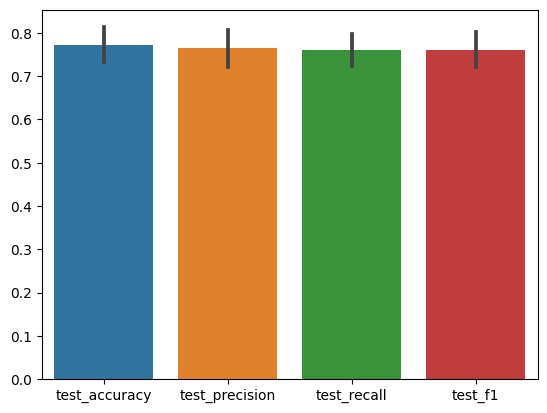

In [32]:
sns.barplot(data=scores_df, ci='sd');

Plots in `seaborn` generally have sensible default values, but they are also highly configurable. This is usually done through a combination of initial argument settings, calling methods after the plot is created, or using `pyplot` to change specific things.

C:\Users\valere.demelier\AppData\Local\Temp\ipykernel_1720\984487818.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.barplot(data=scores_df, ci='sd', palette='pastel', capsize=0.1, order=['test_f1', 'test_precision', 'test_recall', 'test_accuracy']);


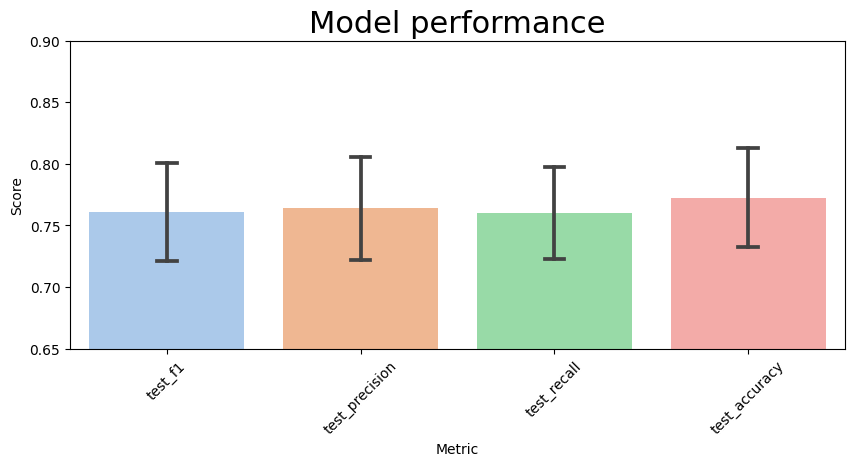

In [33]:
# Changing the size
plt.figure(figsize=(10,4))

# Changing colours, order of the bars, etc
g = sns.barplot(data=scores_df, ci='sd', palette='pastel', capsize=0.1, order=['test_f1', 'test_precision', 'test_recall', 'test_accuracy']);

# Changing font sizes and adding labels
g.set_title('Model performance', fontsize=22)
g.set_xlabel('Metric')
g.set_ylabel('Score')
g.set_ylim(0.65, 0.9)

# Rotating labels - useful if they are too long and overlap.
plt.xticks(rotation=45);

# GridSearch: model tuning and cross-validation

Now, let's use grid search and cross-validation for fine-tuning the model. The `KNN` model has one hyperparameter we can adjust.

The GridSearchCV class needs a model, a dictionary of `{hyperparameters:values}` to try, a cross-validation object, and some metrics to use for evaluation.

First, create a default `KNN` model named `model`, as before. Then, create a `StratifiedKFold` object, with 5 folds, named `my_cv`.

In [34]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import StratifiedKFold

# Your code here...
model = KNN()
my_cv = StratifiedKFold(5)



## Grid search: hyperparameters

The `KNN` hyperparameter we want to investigate is called `n_neighbors` - this determines how many of the most similar data points are used to classify new data points.

Create a dictionary named `hyperparams` with one key, named after the hyperparameter we want to tune. The value for it should be a list with all the settings you want to try for that hyperparameter. Try the values 1 - 10 for this.

In [35]:
# Your code here...
hyperparams = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}


## Grid search: scoring

Knowing when the best hyperparameters have been found requires all models to be scored using some metric. `sklearn` will generally set some sensible default for this, but you can also choose your own. The ones available are below.

In [38]:
print(sorted(sklearn.metrics.SCORERS.keys()))

AttributeError: module 'sklearn.metrics' has no attribute 'SCORERS'

Now create a dictionary named `my_metrics` of the metrics you want to use to evaluate the models with.

The keys are the names you use to identify the metrics. The values should be strings which `sklearn` recognises: use at least `accuracy` and `f1_macro`.

In [39]:
# Your code here...
my_metrics = {'accuracy': 'accuracy', 'f1_macro': 'f1_macro'}

## Grid search: compile and fit

The final step is to create the `GridSearchCV` object and pass it all the arguments from above.

(Tip: Since we are using multiple metrics with `GridSearchCV`, we need to set `refit=False` because by default it tries to fit a best model overall once finished, but can only select the best model using a single metric, not multiple.)

Then, as with most things in `sklearn`, call the `.fit()` method.

It will chug along for a few seconds.

In [40]:
from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(model, hyperparams, cv=my_cv, scoring=my_metrics, refit=False)

gridsearch.fit(x, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]},
             refit=False,
             scoring={'accuracy': 'accuracy', 'f1_macro': 'f1_macro'})

## Grid search: getting the results

The various statistics generated are stored in the `cv_results_` attribute of the `GridSearchCV` object you created. It's a big dictionary of data with scores per fold, per hyperparameter.  It also includes information about how long each model took to train and to evaluate.

Keys are descriptive strings of the data, while the values are arrays containing per-parameter scores and statistics. 

We used 10 settings for 1 hyperparameter, with 5 folds and 2+ metrics. Therefore, for each metric we have 5 items, each containing 10 items. There is also an additional key telling you the rank of each combination, so you can easily find the best one.

The cell below shows all the contents of this dictionary. Note that the metric names used in `my_metrics` are used as part of the names here - this could be useful for finding what you want.

In [41]:
gridsearch.cv_results_

{'mean_fit_time': array([0.00766177, 0.00693107, 0.00651646, 0.00629764, 0.00641341,
        0.00712967, 0.0062223 , 0.00632744]),
 'std_fit_time': array([0.00106997, 0.00088339, 0.00032496, 0.00138149, 0.00037725,
        0.00149736, 0.00075044, 0.00116757]),
 'mean_score_time': array([0.07695045, 0.06868382, 0.06857877, 0.06930733, 0.07004213,
        0.0818924 , 0.06867561, 0.07319016]),
 'std_score_time': array([0.00711874, 0.00334474, 0.00229967, 0.00226883, 0.00340357,
        0.00981521, 0.00471545, 0.00238342]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 13, 15],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11},
  {'n_neighbors': 13},
  {'n_neighbors': 15}],
 'split0_test_accuracy': array([0.76981542, 0.77090119, 0.74918567, 0.74158523, 0.7263

## Reporting fine-tuning results

That's a lot of data! But the most useful ones are those which give the mean scores per metric, per hyperparameter setting. For example `mean_test_f1` and `mean_test_accuracy` if you specified those metrics when setting up `GridSearchCV`.

Visualising this is a bit more fiddly, because the data is not in the ideal format for passing directly to `seaborn` if we want error bars shown.

Below, you can see how to create a DataFrame from the results and visualise the key components.

In [43]:
# Turn GridSearch results into a dataframe
grid_results = pd.DataFrame(gridsearch.cv_results_)

# Drop all the junk
grid_results = grid_results.drop([
       'params', 'mean_test_accuracy', 'std_test_accuracy',
       'rank_test_accuracy', 'mean_test_precision', 'std_test_precision',
       'rank_test_precision', 'mean_test_recall', 'std_test_recall', 'rank_test_recall',
       'mean_test_f1', 'std_test_f1', 'rank_test_f1'], axis=1)

# Melt the wide dataframe into a long one, using the hyperparameter value as the ID.
grid_results = grid_results.melt(id_vars='param_n_neighbors', var_name='metric')

# Remove digits in the metric names so that seaborn will group them for us
grid_results['metric'] = grid_results['metric'].str.replace(r'\d_', '_')
# Remove extra junk from metric names
grid_results['metric'] = grid_results['metric'].str.replace(r'split_test_', '')

# Plot it
sns.catplot(data=grid_results, x='metric', y='value', hue='param_n_neighbors',kind='bar', ci='sd', height=5, aspect=2)

# Zoom in on the y-axis limit to show detail a bit better
sns.mpl.pyplot.ylim(0.65, 0.85);

KeyError: "['mean_test_precision', 'std_test_precision', 'rank_test_precision', 'mean_test_recall', 'std_test_recall', 'rank_test_recall', 'mean_test_f1', 'std_test_f1', 'rank_test_f1'] not found in axis"

 # Getting the best model
 
The `GridSearchCV` above doesn't store the best model, because it used multiple scoring metrics. Now, repeat the process but only use `f1_macro` score.

In [49]:
# Your code here...
from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(model, hyperparams, cv=my_cv, scoring="accuracy", refit=False)

gridsearch.fit(x, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]},
             refit=False, scoring='accuracy')

In [50]:
gridsearch.best_params_

{'n_neighbors': 1}

# Summary

* Data can be split into train/test/validation sets easily with `train_test_split`
* Cross-validation tools in `sklearn.model_selection` mean you can avoid doing that directly yourself
* Same with doing grid search: `GridSearchCV` handles everything
* Visualise results by reporting mean and std of scores across folds, per hyperparameter combination
* Extract the best model through the `best_estimator_` attribute of your grid search

# Going further

* With the information gained from the grid search, train a new model with the optimal settings
* Compare the results here to some kind of baseline model, to get a better idea of how good performance is
    * What data should you use to make your baselines?
* Try other models you are familiar with, which have additional hyperparameters you can tune
* Look into `sklearn.pipeline.Pipeline` for streamlining the process of testing multiple models and hyperparameters